# Data exploration

In this notebook we're analyzing the cleaned dataset as a first step in the project.

Here we'll plot the data as well as find summary statistics.

In [1]:
#libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os

Now, let's import our cleaned dataset. Remember that, because of raw data size, an auxiliar directory containing cleaned data was created. 

```
data/processed/cleaned_dataset.csv    -> This won't be available on GitHub, only in Deepnote

data_sent_github/cleaned_dataset.csv  -> This will be available in both GitHub and Deepnote
```

For your convenience, I'll be working with the dataset which will be stored on GitHub.

In [2]:
DATA_CLEANED_DIR = os.path.join(os.getcwd(), os.pardir, 'data_sent_github')
print(DATA_CLEANED_DIR)

/work/churn_predictive_model/notebooks/../data_sent_github


In [3]:
df = pd.read_csv(DATA_CLEANED_DIR+'/cleaned_dataset.csv', index_col=[0])

In [4]:
#Let's make sure there're no duplicates
df.drop_duplicates(subset=['CustomerId'], keep='first', inplace=True)

In [5]:
df.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,...,birth_date_year,birth_date_month,birth_date_day,ContractId,Products,Date,Score,Value,eligible,client_age
0,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27,...,1979.0,2.0,2.0,WWlyRDX8AsGnWUPYiYGjidGKI,Product B,2019-06,683,0.00,0,40
1,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11,...,1974.0,7.0,7.0,orIBQM9pK7Z7AYBQok1jypK6t,Product D,2018-02,487,119657.24,0,43
3,15982728,GOUDEAU,France,Male,0.0,1.0,66465.09,2018-02-02,2019-06-01,1972-12-18,...,1972.0,12.0,12.0,sdnOZ3fBpu1sKsYrZJE9tfcRP,Product B,2018-02,595,43353.50,0,45
4,15434700,STIMMELL,Germany,Male,1.0,0.0,138615.32,2018-06-06,NaN,1994-07-22,...,1994.0,7.0,7.0,dF2Z2DZoUYMmf0ST8keQjvKQL,Product A,2018-06,706,92357.90,0,23
5,15898769,ALCOCK,Germany,Female,0.0,0.0,197095.28,2018-06-09,2019-06-16,1998-05-14,...,1998.0,5.0,5.0,gfCNu3alAqn2HgWKamcXqOaij,Product D,2018-06,532,0.00,0,20


In [6]:
df.dtypes

CustomerId                  int64
Surname                    object
Geography                  object
Gender                     object
HasCrCard                 float64
IsActiveMember            float64
EstimatedSalary           float64
application_date           object
exit_date                  object
birth_date                 object
application_date_year       int64
application_date_month      int64
application_date_day        int64
exit_date_year            float64
exit_date_month           float64
exit_date_day             float64
birth_date_year           float64
birth_date_month          float64
birth_date_day            float64
ContractId                 object
Products                   object
Date                       object
Score                       int64
Value                     float64
eligible                    int64
client_age                  int64
dtype: object

In [7]:
#Transforming datetimes
df['application_date'] = pd.to_datetime(df['application_date'])
df['exit_date'] = pd.to_datetime(df['exit_date'])
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [8]:
#First summary stats
df.describe()

,CustomerId,HasCrCard,IsActiveMember,EstimatedSalary,application_date_year,application_date_month,application_date_day,exit_date_year,exit_date_month,exit_date_day,birth_date_year,birth_date_month,birth_date_day,Score,Value,eligible,client_age
count,1.154590e+05,115459.000000,115459.000000,115459.000000,115459.000000,115459.000000,115459.000000,26340.000000,26340.000000,26340.000000,115459.000000,115459.000000,115459.000000,115459.000000,1.154590e+05,115459.000000,115459.000000
mean,1.526473e+07,0.507565,0.498965,101169.173773,2018.307339,6.527079,15.718775,2018.634472,7.181777,15.950683,1979.250011,6.522549,6.522549,649.931266,8.072453e+04,0.020847,38.555409
std,4.338454e+05,0.499945,0.500001,55697.768711,0.773076,3.440584,8.815595,0.642021,3.156183,8.765211,10.289856,3.449153,3.449153,96.495688,5.665361e+04,0.142873,10.239287
min,1.450003e+07,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,2015.000000,1.000000,1.000000,1923.000000,1.000000,1.000000,174.000000,-1.818989e-12,0.000000,18.000000
25%,1.488562e+07,0.000000,0.000000,61025.445000,2018.000000,4.000000,8.000000,2018.000000,5.000000,8.000000,1972.000000,4.000000,4.000000,584.000000,3.495673e+04,0.000000,31.000000
50%,1.527644e+07,1.000000,0.000000,100310.240000,2018.000000,7.000000,16.000000,2019.000000,8.000000,16.000000,1979.000000,7.000000,7.000000,650.000000,7.837243e+04,0.000000,38.000000
75%,1.564730e+07,1.000000,1.000000,139591.390000,2019.000000,10.000000,23.000000,2019.000000,10.000000,24.000000,1986.000000,10.000000,10.000000,715.000000,1.201663e+05,0.000000,45.000000
max,1.599997e+07,1.000000,1.000000,349079.680000,2019.000000,12.000000,31.000000,2019.000000,12.000000,31.000000,2001.000000,12.000000,12.000000,1000.000000,3.746337e+05,1.000000,92.000000


Previous stats tell us that:

* The population is adult and most of them (at least 75%) are 45 year old or less.
* 25% of clients earn at least 61025.45.
* At least 50% of them have a credit card. 

Let's visualize variables.

In [9]:
sns.set_theme()

Geography:

In [ ]:
df['Geography'].value_counts()

France     39365
Germany    38058
Spain      38036
Name: Geography, dtype: int64

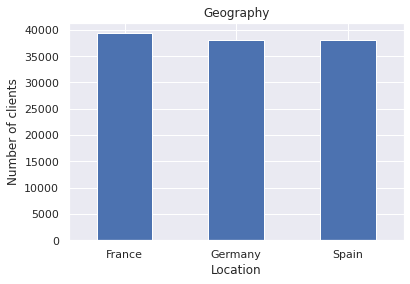

In [ ]:
fig, ax = plt.subplots()
ax = df['Geography'].value_counts().plot.bar(rot=0)
plt.title('Geography')
plt.xlabel('Location')
plt.ylabel('Number of clients')
plt.show()

Gender:

In [ ]:
df['Gender'].value_counts()

Male      57897
Female    57562
Name: Gender, dtype: int64

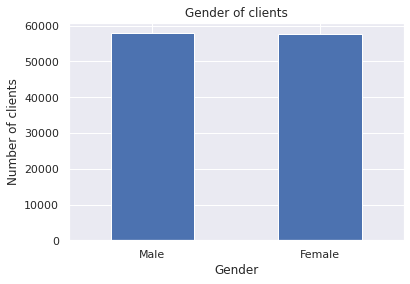

In [ ]:
fig, ax = plt.subplots()
ax = df['Gender'].value_counts().plot.bar(rot=0)
plt.title('Gender of clients')
plt.xlabel('Gender')
plt.ylabel('Number of clients')
plt.show()

Has credit card:

In [ ]:
df['HasCrCard'].value_counts()

1.0    58603
0.0    56856
Name: HasCrCard, dtype: int64

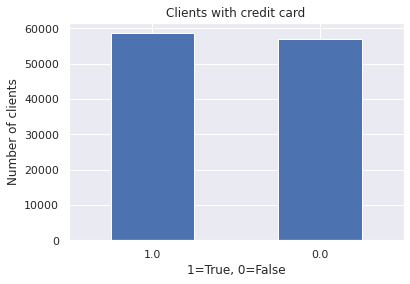

In [ ]:
fig, ax = plt.subplots()
ax = df['HasCrCard'].value_counts().plot.bar(rot=0)
plt.title('Clients with credit card')
plt.xlabel('1=True, 0=False')
plt.ylabel('Number of clients')
plt.show()

Is active member:

In [ ]:
df['IsActiveMember'].value_counts()

0.0    57849
1.0    57610
Name: IsActiveMember, dtype: int64

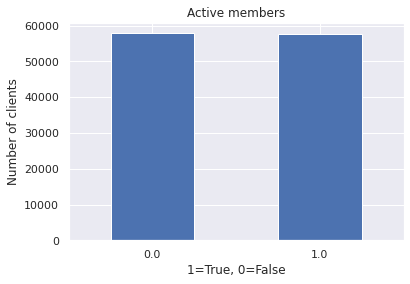

In [ ]:
fig, ax = plt.subplots()
ax = df['IsActiveMember'].value_counts().plot.bar(rot=0)
plt.title('Active members')
plt.xlabel('1=True, 0=False')
plt.ylabel('Number of clients')
plt.show()

Estimated salary:

In [ ]:
import math

In [ ]:
len(df['EstimatedSalary'])

115459

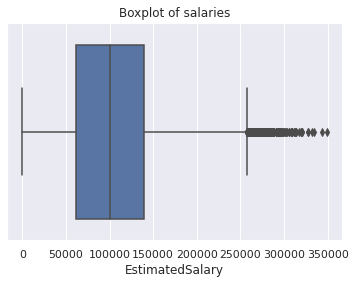

In [ ]:
fig, ax = plt.subplots()
ax = sns.boxplot(data=df, x='EstimatedSalary')
plt.title('Boxplot of salaries')
plt.show()

Products:

In [ ]:
df['Products'].value_counts()

Product B    28997
Product C    28886
Product A    28826
Product D    28750
Name: Products, dtype: int64

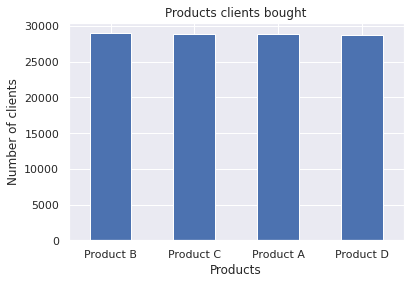

In [ ]:
fig, ax = plt.subplots()
ax = df['Products'].value_counts().plot.bar(rot=0)
plt.title('Products clients bought')
plt.xlabel('Products')
plt.ylabel('Number of clients')
plt.show()

Credit score at the moment of application:

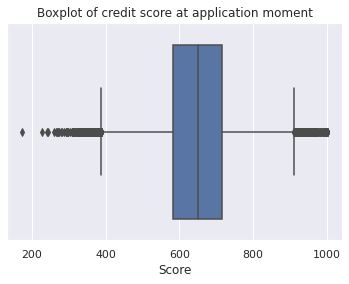

In [10]:
fig, ax = plt.subplots()
ax = sns.boxplot(data=df, x='Score')
plt.title('Boxplot of credit score at application moment')
plt.show()

Transaction balance:

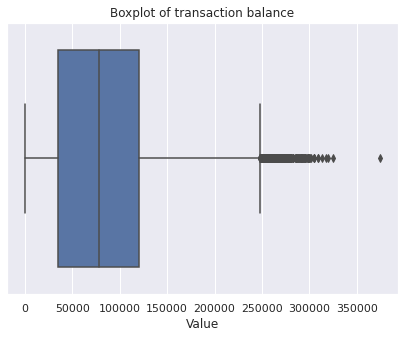

In [13]:
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.boxplot(data=df, x='Value')
plt.title('Boxplot of transaction balance')
plt.show()

Eligible:

In [14]:
df['eligible'].value_counts()

0    113052
1      2407
Name: eligible, dtype: int64

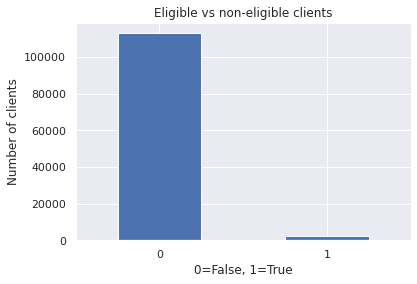

In [15]:
fig, ax = plt.subplots()
ax = df['eligible'].value_counts().plot.bar(rot=0)
plt.title('Eligible vs non-eligible clients')
plt.xlabel('0=False, 1=True')
plt.ylabel('Number of clients')
plt.show()

Age of clients when they applied:

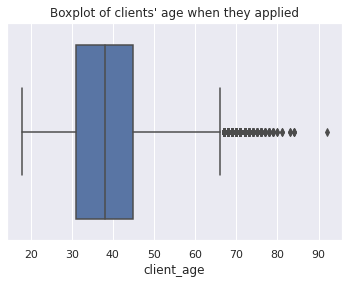

In [17]:
fig, ax = plt.subplots()
ax = sns.boxplot(data=df, x='client_age')
plt.title('Boxplot of clients\' age when they applied')
plt.show()

## Impressions so far

Categorical variables:

* Locations are evenly distributed among France, Germany and Spain. 
* There a bit more male clients, but the difference is very small. Same for clients who have a credit card and active members.
* There's no special preference for any product. All of them have almost the same number of sales.
* The number of eligible clients (those who have been in relationship with the company for at least 2 years) is significantly small compared to non-eligible ones.

Numeric variables:

* It's more likely to find salaries from 0 to 250000. There're some outliers. Those may be high net worth people.
* Credit scores are more likely to be between 400 and 900. There're outliers at both extremes.
* The distribution of transactions is quite similar to salaries distribution.
* All clients are adults. They tend to be young adults. At least 50% of them are millennials. There some boomers as well. Outliers represent senior people (over 68 years old).
* Distributions don't follow a normal pattern.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb2ec55e-ada8-4de4-93de-2d05f236c13b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>